# Model Complexity vs Performance in Machine Learning

In this project the relationship between model complexity and generalization performanc is explored by adjusting key parameters of various supervised learning models: regression and classification.

## Part 1 - Regression

<IPython.core.display.Javascript object>


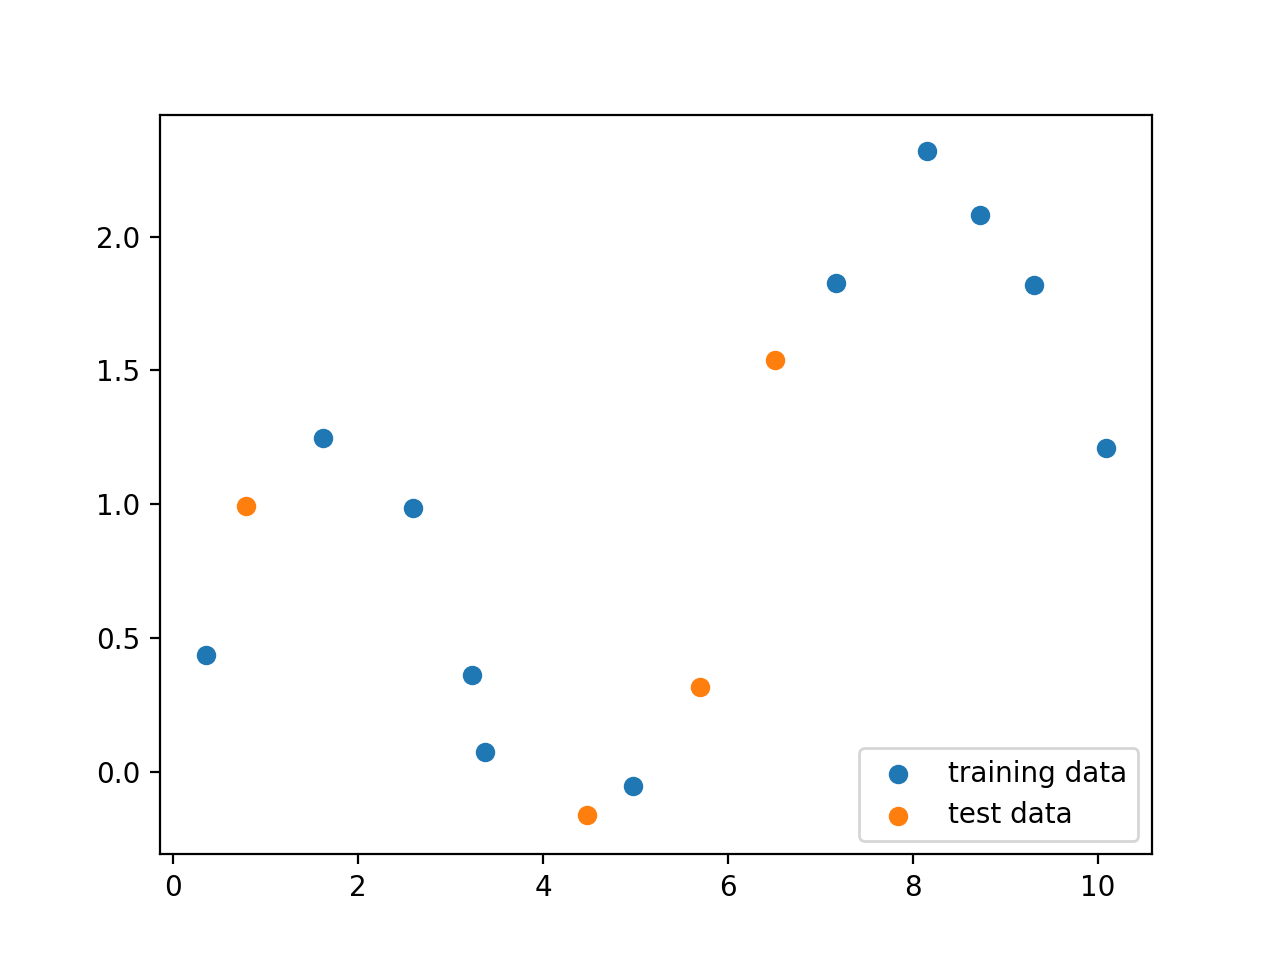

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Visualize the dataset by plotting a scatterplot of the data points in the training and test sets.

def part1_scatter():
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
    
     
part1_scatter()


### Polynomial Models of Various Degrees

The function below fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9.  For each model, 100 predicted values over the interval x = 0 to 10 are found and stored a numpy array. The first row of this array corresponds to the output from the model trained on degree 1, the second row on degree 3, the third row on degree 6, and the fourth row on degree 9.


In [2]:
def linear_reg():
    
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4, 100))
    
    for i, d in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(X_train.reshape(-1,1))
        LR = LinearRegression().fit(X_poly, y_train)
        X_test = np.linspace(0,10,100).reshape(-1,1)
        y_predict = LR.predict(poly.fit_transform(X_test))
        degree_predictions[i, :] = y_predict
    
    return degree_predictions

linear_reg()

array([[  2.53040195e-01,   2.69201547e-01,   2.85362899e-01,
          3.01524251e-01,   3.17685603e-01,   3.33846955e-01,
          3.50008306e-01,   3.66169658e-01,   3.82331010e-01,
          3.98492362e-01,   4.14653714e-01,   4.30815066e-01,
          4.46976417e-01,   4.63137769e-01,   4.79299121e-01,
          4.95460473e-01,   5.11621825e-01,   5.27783177e-01,
          5.43944529e-01,   5.60105880e-01,   5.76267232e-01,
          5.92428584e-01,   6.08589936e-01,   6.24751288e-01,
          6.40912640e-01,   6.57073992e-01,   6.73235343e-01,
          6.89396695e-01,   7.05558047e-01,   7.21719399e-01,
          7.37880751e-01,   7.54042103e-01,   7.70203454e-01,
          7.86364806e-01,   8.02526158e-01,   8.18687510e-01,
          8.34848862e-01,   8.51010214e-01,   8.67171566e-01,
          8.83332917e-01,   8.99494269e-01,   9.15655621e-01,
          9.31816973e-01,   9.47978325e-01,   9.64139677e-01,
          9.80301028e-01,   9.96462380e-01,   1.01262373e+00,
        

<IPython.core.display.Javascript object>


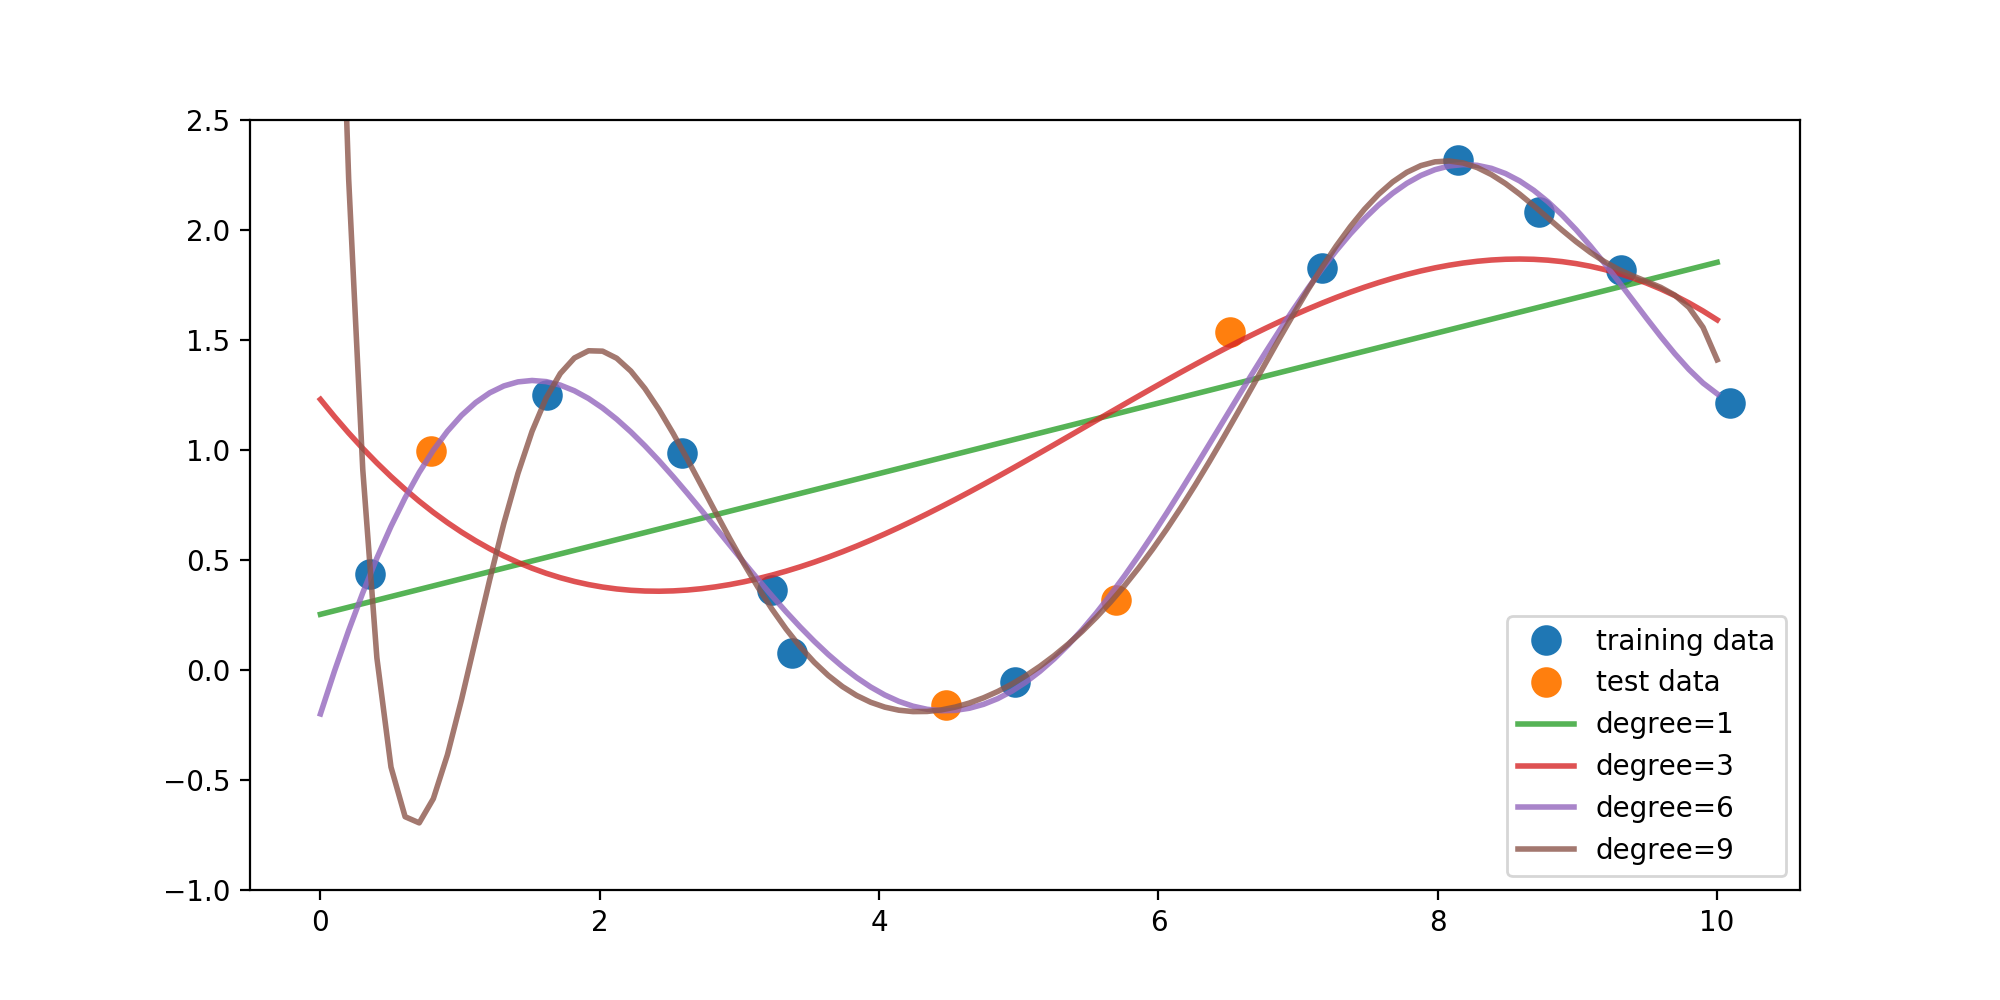

In [3]:
# plot the fitted models on top of the original data

def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(linear_reg())

### Coefficients of Determination

The function below fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model it computes the $R^2$ regression score on the training data as well as the the test data, and returns both of these arrays in a tuple.


In [4]:
def linear_two():
    
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    
    for d in range(10):
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(X_train.reshape(-1,1))
        LR = LinearRegression().fit(X_poly, y_train)
        r2_train[d] = LR.score(X_poly, y_train)
        X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
        r2_test[d] = LR.score(X_test_poly, y_test)

    return (r2_train, r2_test)

linear_two()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247944, -0.64525447]))

### Models' Performance

The $R^2$ scores determine what degree level corresponds to a model that is underfitting, what degree level corresponds to a model that is overfitting, and what degree level provides a model with good generalization performance on this dataset. 

<IPython.core.display.Javascript object>


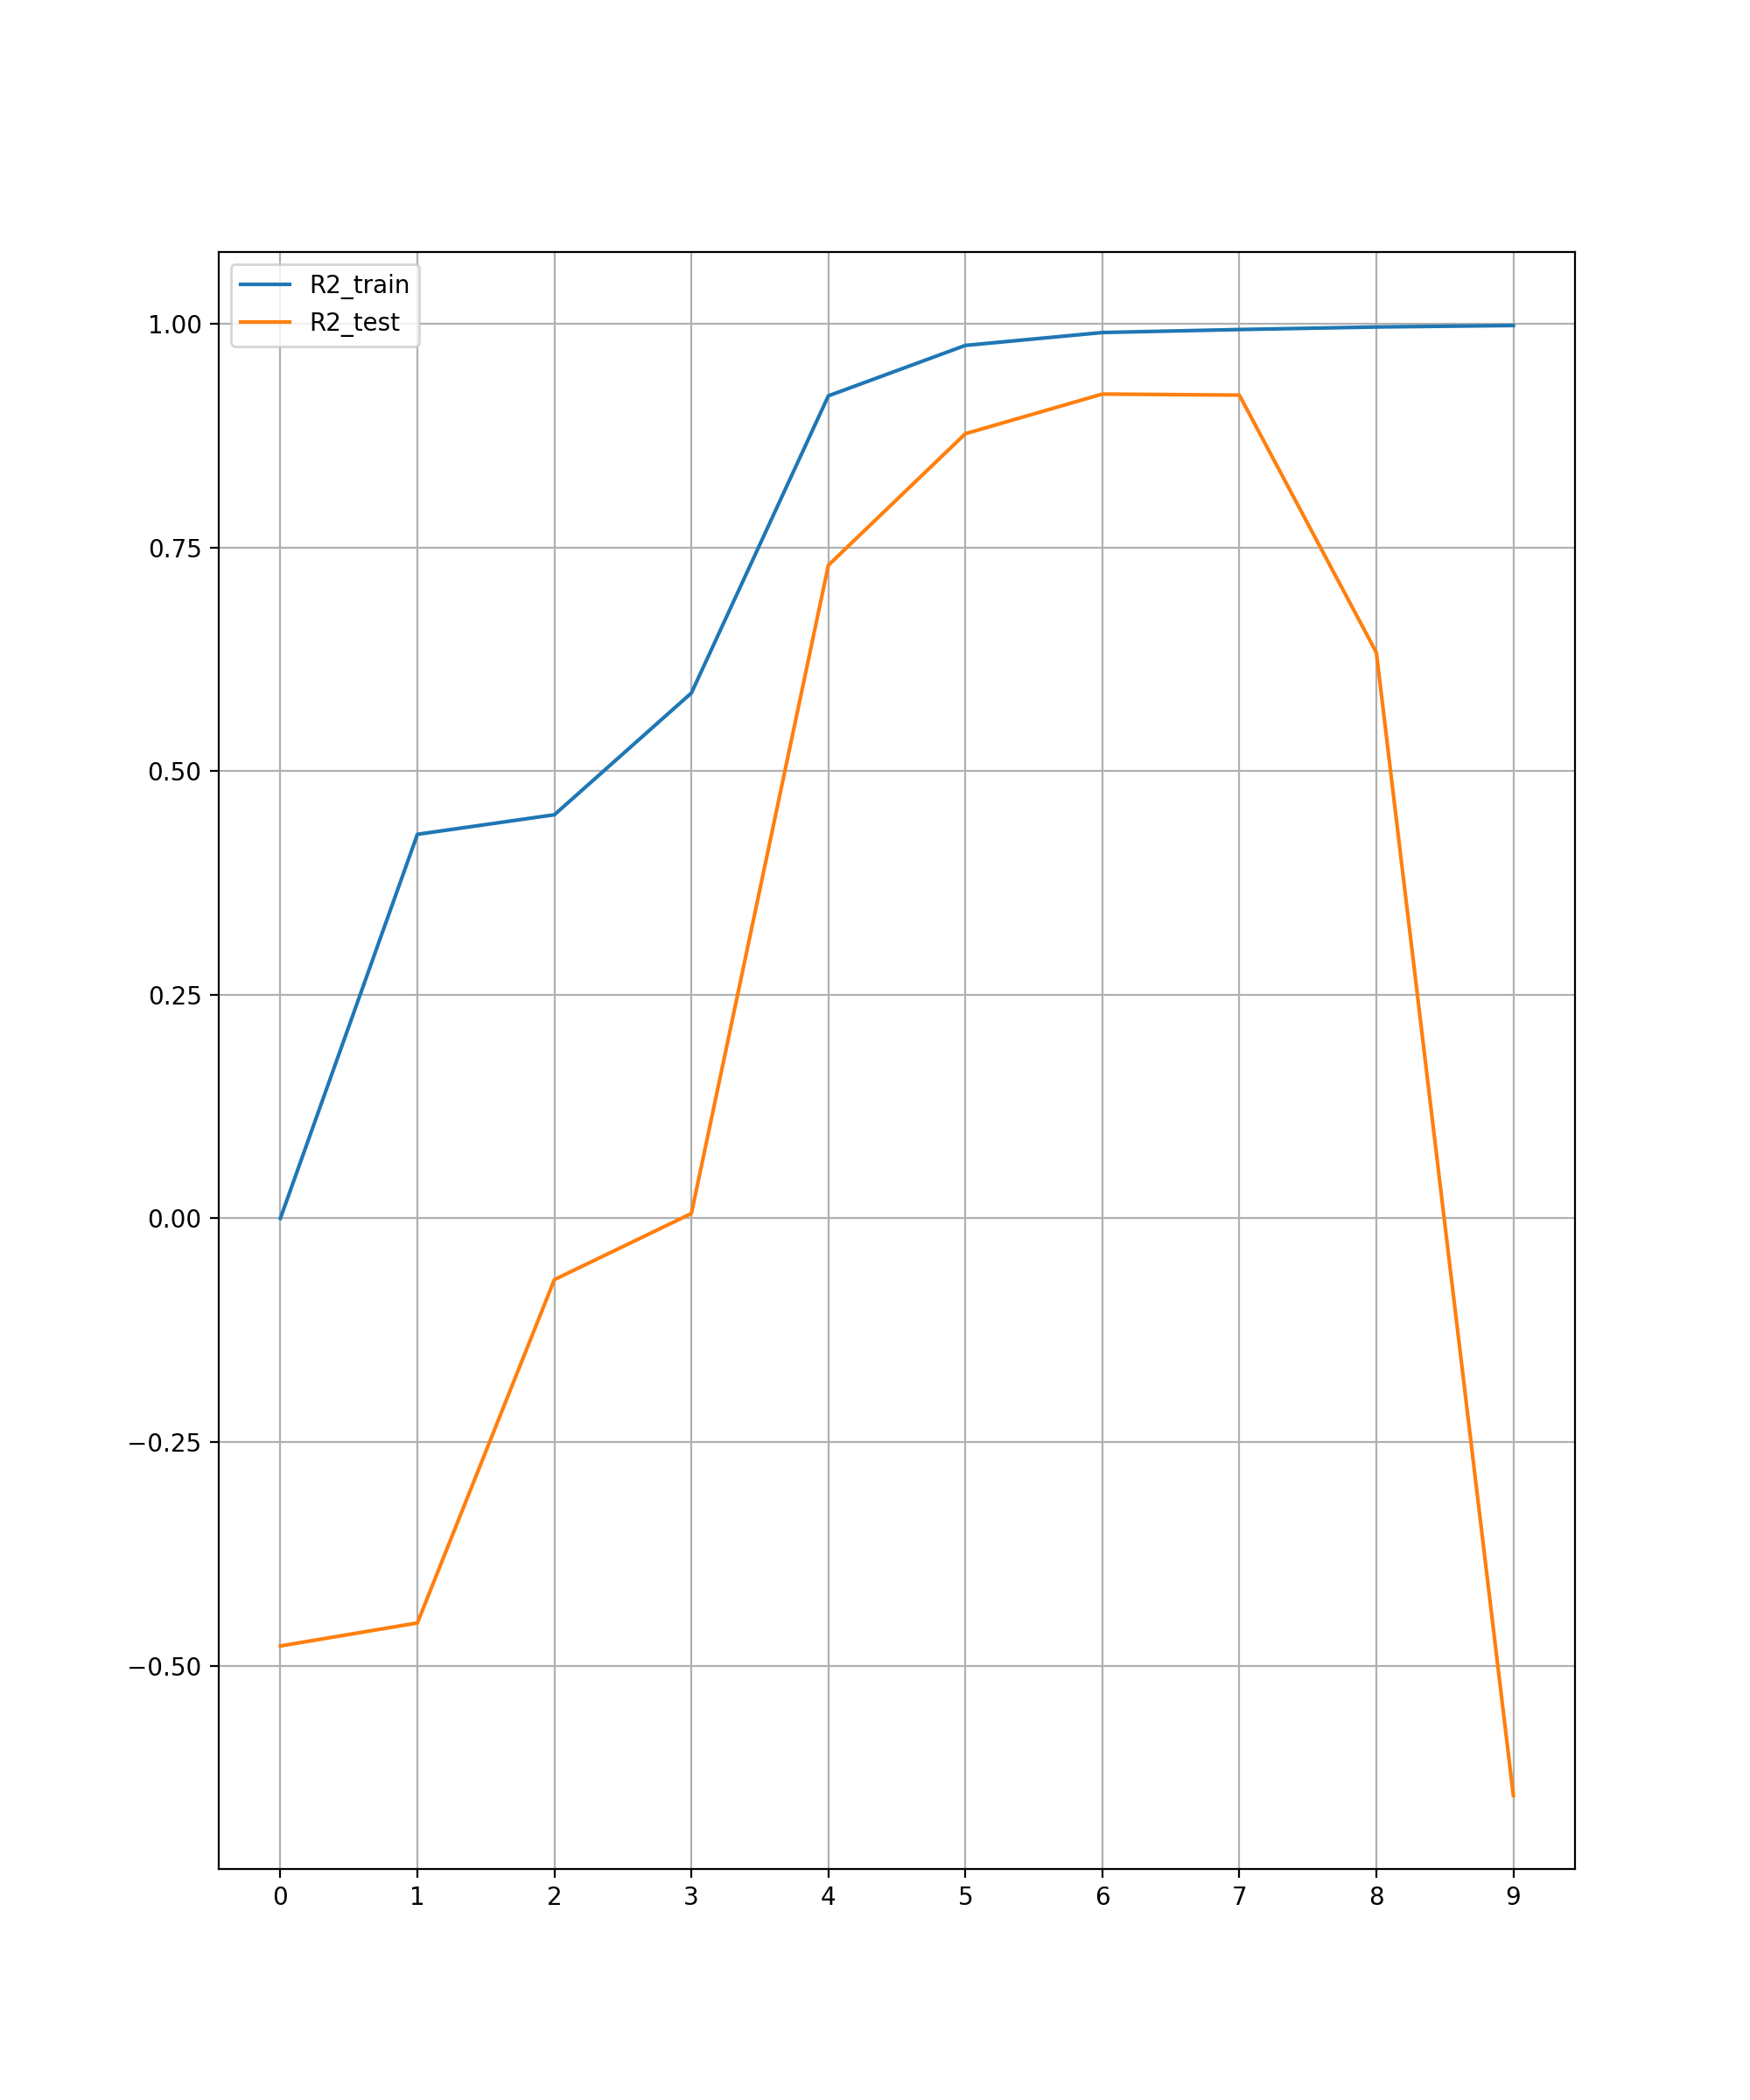

In [5]:
r2_train, r2_test = linear_two()
degrees = np.arange(0, 10)

plt.figure(figsize = (10,12))
plt.plot(degrees, r2_train, label='R2_train')
plt.plot(degrees, r2_test, label='R2_test')
plt.legend()
plt.xticks(np.arange(0, 10, 1))
plt.grid()
plt.show()



In [6]:
def performance():
    
    # (Underfitting, Overfitting, Good_Generalization)
    Under = np.random.randint(low = 0, high = 4)
    Over = np.random.randint(low = 8, high = 9)
    Good = np.random.randint(low = 5, high = 7)
    
    return (Under, Over, Good)
    
performance()

(3, 8, 5)

## Part 2 - Classification: Poisonous Mushrooms!

The data [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv` is used to train a model to predict whether or not a mushroom is poisonous. 

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is originally encoded as strings. These values are converted to numeric by using pd.get_dummies to convert the categorical variables into indicator variables. 

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# Use the 25% test split created above as the representative subset.

X_subset = X_test2
y_subset = y_test2

mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
mush_df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Decision Tree Classifier

A Decision Tree Classifier with default parameters and random_state=0 is trained to determine the five most important features inthe dataset.


In [10]:
def important_features():
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    features = []
    for feature, importance in zip(X_train2.columns, clf.feature_importances_):
        features.append((importance, feature))
    features.sort(reverse=True)
    
    return [feature[1] for feature in features[:5]]


important_features()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Support Vector Classifier (SVC)

Training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values are determined.  The validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.


In [11]:
def SVC_scores():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    train_scores, test_scores = validation_curve(SVC(random_state=0), X_subset, y_subset,
                                                 param_name='gamma', param_range=np.logspace(-4,1,6), 
                                                 scoring='accuracy')
    train_scores = train_scores.mean(axis=1)
    test_scores = test_scores.mean(axis=1)

    return train_scores, test_scores

SVC_scores()

(array([ 0.56647847,  0.93155951,  0.99039881,  1.        ,  1.        ,  1.        ]),
 array([ 0.56768547,  0.92959558,  0.98965952,  1.        ,  0.99507994,
         0.52240279]))

### SVC Model Performance

Based on the SVC scores gamma value which corresponds to a model that is underfitting (and has the worst test set accuracy), gamma value which corresponds to a model that is overfitting (and has the worst test set accuracy), and gamma that would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set) are determined. 


<IPython.core.display.Javascript object>


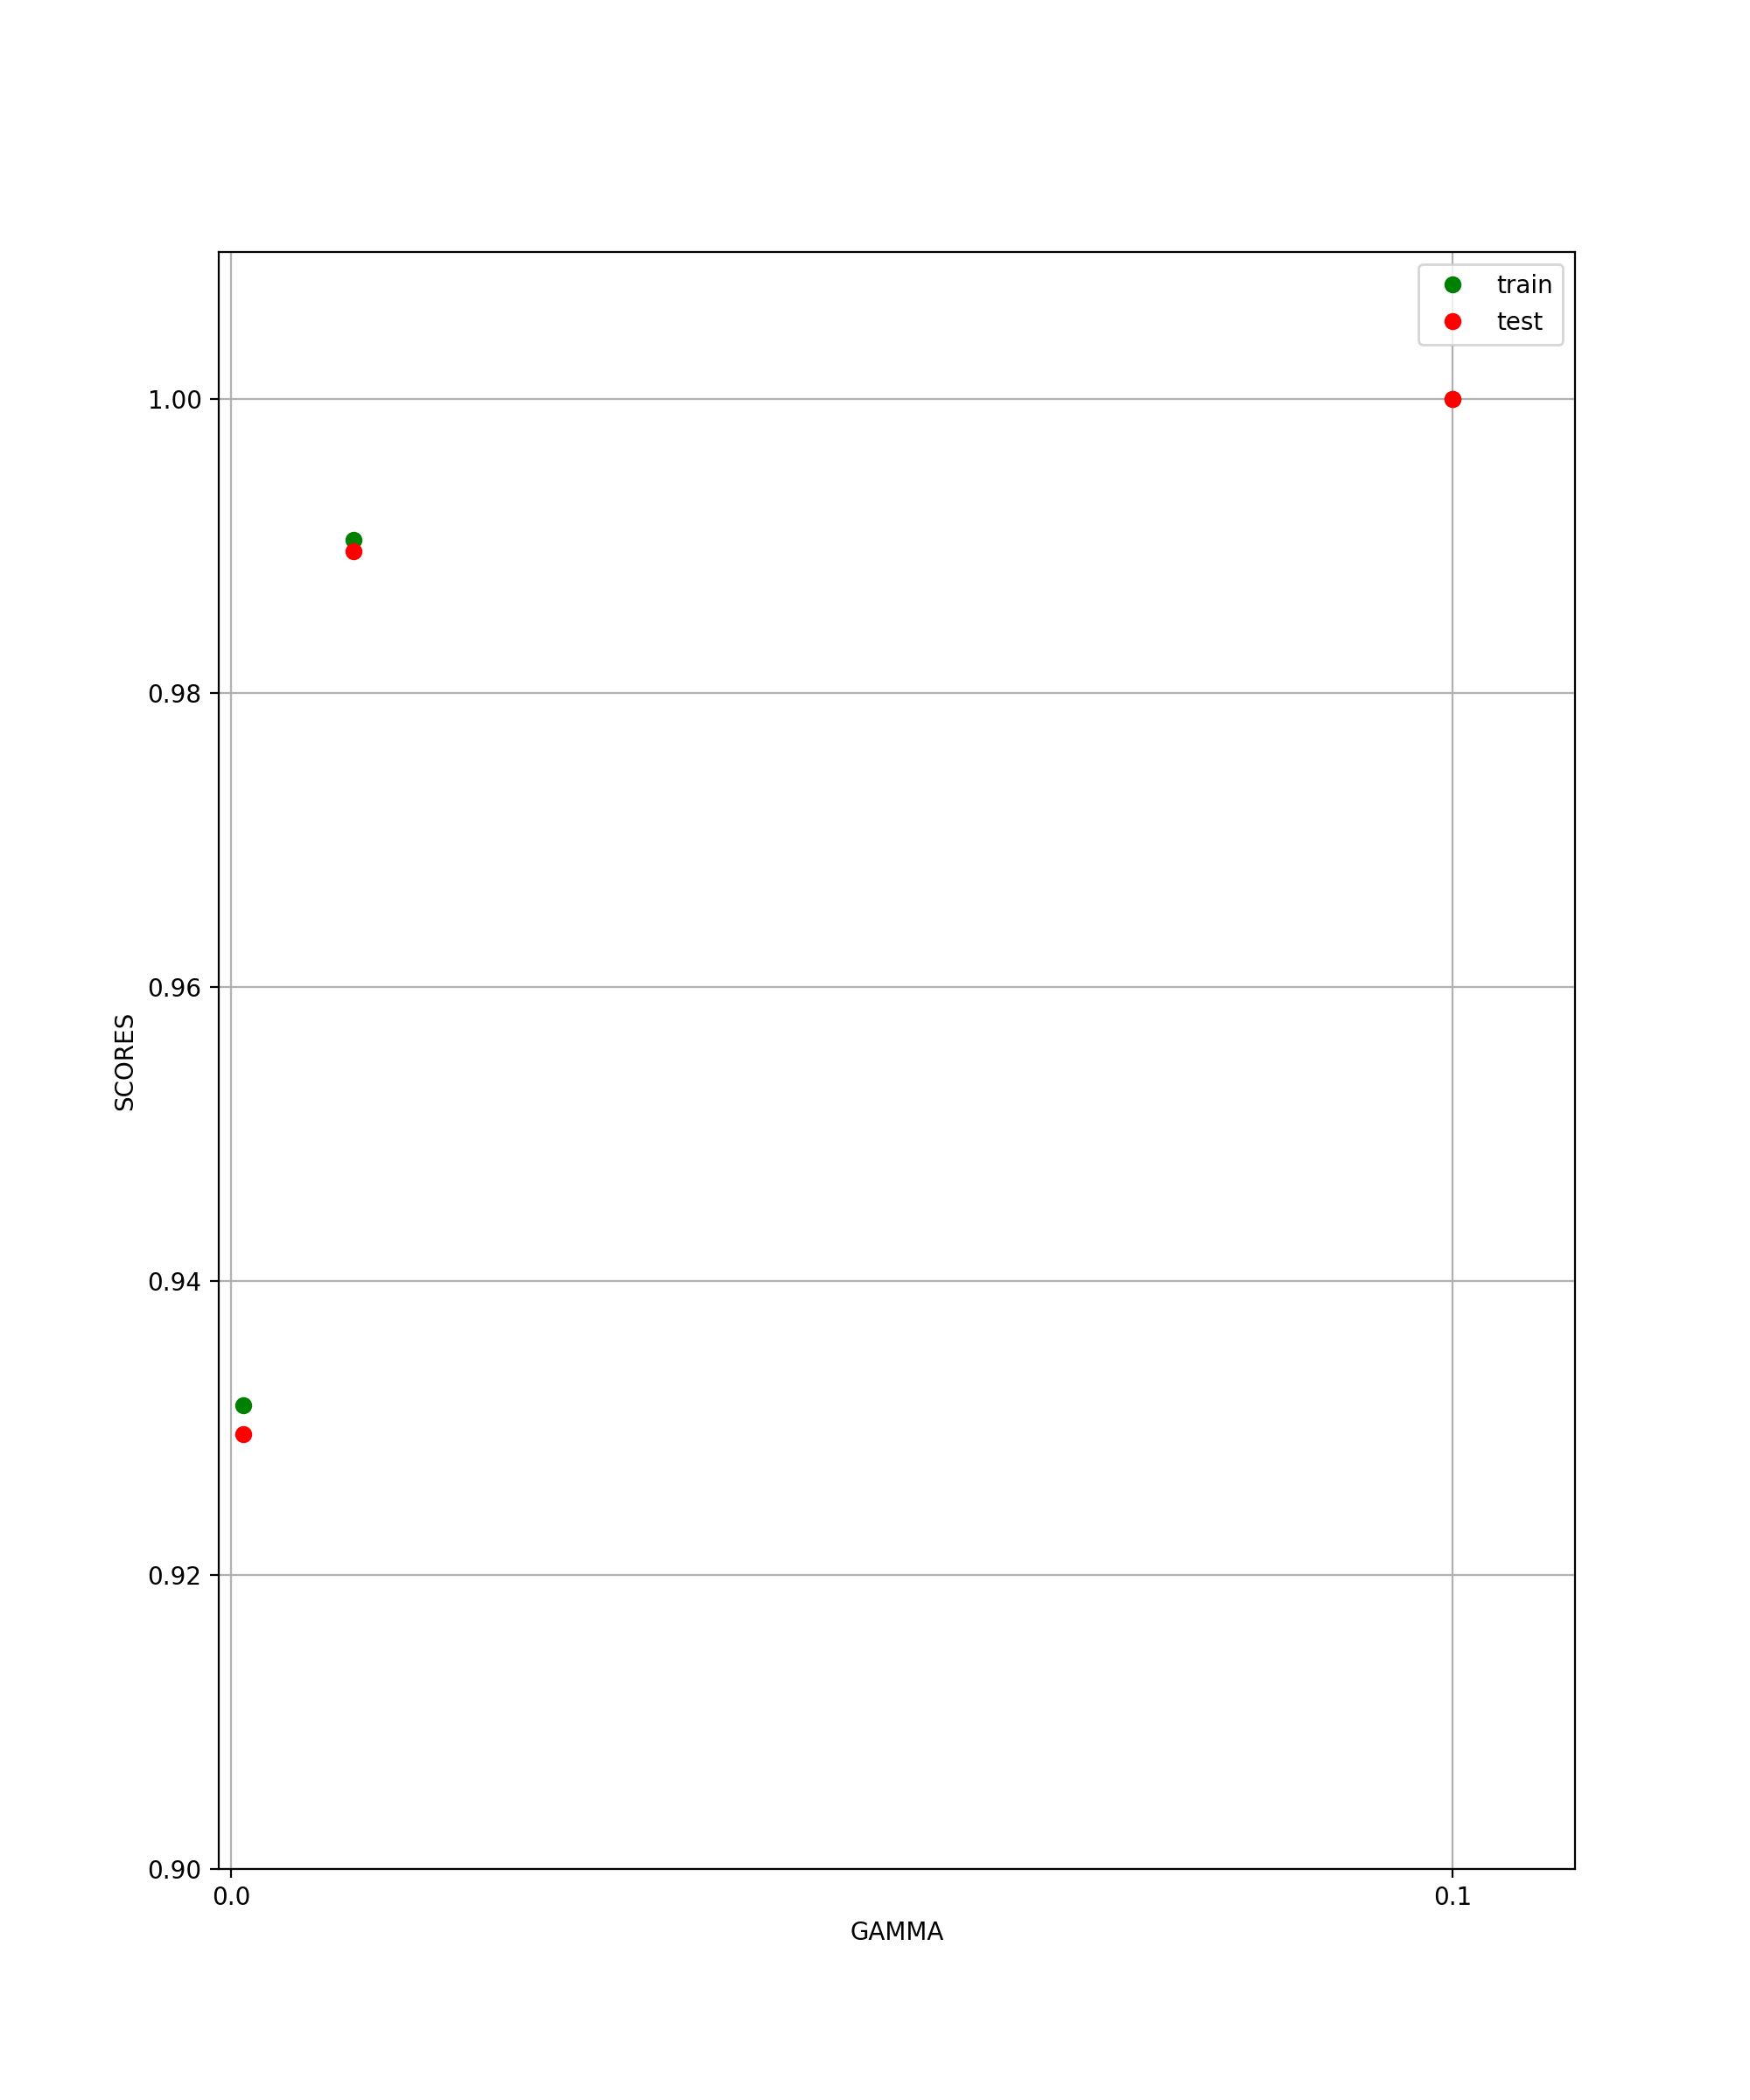

In [12]:
train_scores, test_scores = SVC_scores()
gamma = np.logspace(-4,1,6)

plt.figure(figsize = (10,12))
plt.plot(gamma, train_scores, 'go', lw = 2, label = 'train') 
plt.plot(gamma, test_scores, 'ro', lw = 2, label = 'test')
plt.xticks(np.arange(0, 0.11, 0.1))
plt.xlim(-0.001, 0.11)
plt.ylim(0.9, 1.01)
plt.xlabel('GAMMA')
plt.ylabel('SCORES')
plt.legend()
plt.grid()
plt.show()

In [13]:
def model_choice():
    
    # Underfitting, Overfitting, Good_Generalization
    
    Under = 0.0001
    Over = 10
    Good = 0.1
    
    return (Under, Over, Good)